## Importing Required Libraries

This cell imports essential libraries for data analysis, visualization, and custom modules for preprocessing, sentiment analysis, and thematic analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Importing necessary modules
import sys
sys.path.insert(1, '../scripts')
from preprocessors import Preprocessor
from sentiment_analyzer import SentimentAnalyzer as SA
from thematic_analyzer import ThematicAnalyzer as TA

/home/est-lul/Documents/Projects/customer-experience-analytics/.venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting Up Progress Bars

This cell sets up the tqdm progress bar for pandas operations to monitor the progress of long-running tasks.

In [2]:
from tqdm import tqdm
tqdm.pandas()

## Loading the Dataset

This cell loads the customer reviews dataset for the Commercial Bank of Ethiopia from a CSV file.

In [3]:
try:
    # Load the dataset
    df = pd.read_csv('../../data/Bank_of_Abyssinia_reviews.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred: {e}")
    exit(1)

In [4]:
print(df.shape)
df.head()

(500, 6)


,review_text,rating,date,bank_name,source,user_name
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,Robel Alebachew
1,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play,Haymanot Anberber
2,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play,Mohamed Abdillahi
3,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,Ahadu tech
4,This App is not interest for Android phone Ple...,1,2025-06-01,Bank of Abyssinia,Google Play,Fentaw Kefyalew


# Initializing the Preprocessor

This cell initializes the text preprocessor, which will be used for language detection and text cleaning.

In [5]:
# Initialize the preprocessor
preprocessor = Preprocessor()

[nltk_data] Downloading package punkt to /home/est-lul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/est-lul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Detecting Language of Reviews

This cell detects the language of each review using the preprocessor and adds the result as a new column.

In [6]:
# Detecting language of the reviews
df['language'] = df['review_text'].progress_apply(preprocessor.detect_language)
df.head()

100%|██████████| 500/500 [10:29<00:00,  1.26s/it]


,review_text,rating,date,bank_name,source,user_name,language
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,Robel Alebachew,en
1,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play,Haymanot Anberber,fr
2,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play,Mohamed Abdillahi,so
3,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,Ahadu tech,en
4,This App is not interest for Android phone Ple...,1,2025-06-01,Bank of Abyssinia,Google Play,Fentaw Kefyalew,en


## Filtering Out Unknown Languages

This cell removes reviews where the language could not be detected.

In [7]:
# Filter out rows where language detection failed
df = df[df['language'] != 'UNKNOWN'].copy()
print(df.shape)

(465, 7)


## Plotting Rating Distribution

This cell visualizes the distribution of ratings in the dataset using a bar chart.

<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

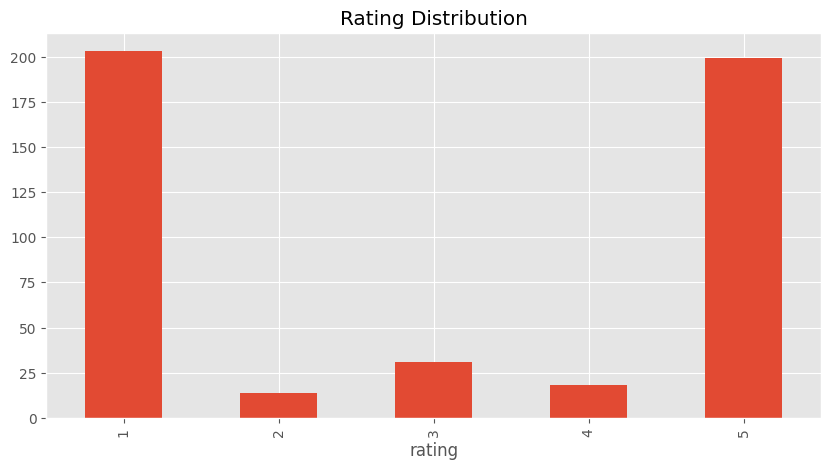

In [8]:
# Plotting the distribution of ratings
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution', figsize=(10, 5))

## Preprocessing Review Text

This cell applies text preprocessing (such as cleaning and normalization) to each review.

In [9]:
# Apply preprocessing to the review text
df['processed_text'] = df['review_text'].progress_apply(preprocessor.preprocess_text)

100%|██████████| 465/465 [00:02<00:00, 178.39it/s]


## Initializing Sentiment Analyzer

This cell initializes the sentiment analyzer for further sentiment analysis tasks.

In [10]:
# Initialize the sentiment analyzer
sa = SA()

## Applying TextBlob Sentiment Analysis

This cell applies TextBlob sentiment analysis to the processed reviews and displays the sentiment distribution.

In [11]:
# Apply TextBlob sentiment analysis
df['textblob_sentiment'] = df['processed_text'].progress_apply(sa.get_textblob_sentiment)

# Display sentiment distribution
print(df['textblob_sentiment'].value_counts())

100%|██████████| 465/465 [00:00<00:00, 6864.97it/s]

textblob_sentiment
positive    228
neutral     142
negative     95
Name: count, dtype: int64


## Applying VADER Sentiment Analysis

This cell applies VADER sentiment analysis to the reviews and displays the sentiment distribution.

In [12]:
# Apply VADER sentiment analysis
df['vader_sentiment'] = df['review_text'].progress_apply(sa.get_vader_sentiment)

# Display VADER sentiment distribution
print(df['vader_sentiment'].value_counts())

100%|██████████| 465/465 [00:01<00:00, 235.21it/s]

vader_sentiment
positive    217
neutral     131
negative    117
Name: count, dtype: int64


## Applying DistilBERT Sentiment Analysis

This cell applies DistilBERT sentiment analysis to the reviews and displays the sentiment distribution.

In [13]:
# Apply DistilBERT sentiment analysis
df['distilbert_sentiment'] = df['review_text'].progress_apply(sa.get_distilbert_sentiment)

# Display DistilBERT sentiment distribution
print(df['distilbert_sentiment'].value_counts())

100%|██████████| 465/465 [00:11<00:00, 39.02it/s]

distilbert_sentiment
NEGATIVE    258
POSITIVE    207
Name: count, dtype: int64


In [14]:
df.sample(10)

,review_text,rating,date,bank_name,source,user_name,language,processed_text,textblob_sentiment,vader_sentiment,distilbert_sentiment
443,This app doesn't work,1,2024-06-30,Bank of Abyssinia,Google Play,Natalieno Gebremichael,en,app work,neutral,neutral,NEGATIVE
412,The new app is very good,5,2024-07-13,Bank of Abyssinia,Google Play,Doye Entertainment,en,new app good,positive,positive,POSITIVE
345,Is it necessary to switch off developer option...,1,2024-08-04,Bank of Abyssinia,Google Play,Dani Man,en,necessary switch developer option every time u...,neutral,neutral,NEGATIVE
5,BoA system is confartable,5,2025-06-01,Bank of Abyssinia,Google Play,Mansour Abdulkadir,en,boa system confartable,neutral,neutral,NEGATIVE
488,Kerfafa new,1,2024-06-01,Bank of Abyssinia,Google Play,Nuhfahad Abdelkader,cy,kerfafa new,positive,neutral,POSITIVE
175,The latest update has stopped android 9 phones...,1,2024-11-26,Bank of Abyssinia,Google Play,Khalid Ahmed,en,latest update stopped android 9 phone open app...,positive,negative,NEGATIVE
213,Abessnya Banke,5,2024-11-05,Bank of Abyssinia,Google Play,Aschalew W/yohnse,id,abessnya banke,neutral,neutral,NEGATIVE
384,Naziriet measho 89160437,1,2024-07-22,Bank of Abyssinia,Google Play,Nazret Measho,en,naziriet measho 89160437,neutral,neutral,NEGATIVE
416,"This is the most stupid app I've seen, why wou...",1,2024-07-12,Bank of Abyssinia,Google Play,Hailye Mesafint,en,stupid app seen would turn developer mode ca m...,negative,negative,NEGATIVE
80,BoA Greqt Ethiopian bank.,5,2025-03-11,Bank of Abyssinia,Google Play,DAMTE BIRU,en,boa greqt ethiopian bank,neutral,neutral,NEGATIVE


## Sentiment Count per Rating

This cell creates a barplot showing the count of each sentiment (positive, negative, etc.) per rating.

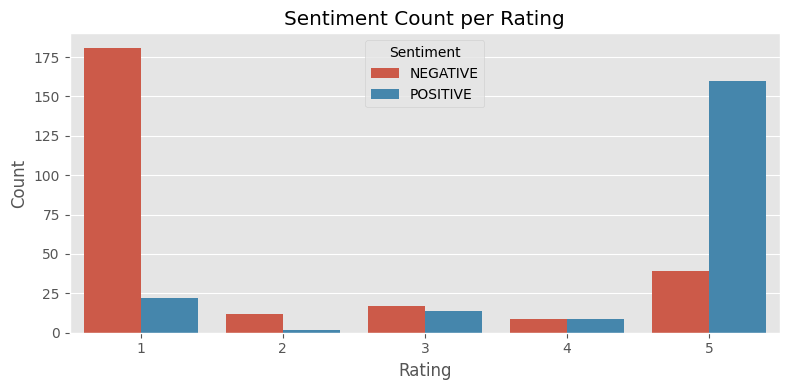

In [15]:
# Plotting the sentiment distribution for distilBERT
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating', hue='distilbert_sentiment')
plt.title('Sentiment Count per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Initializing Thematic Analyzer and Extracting Keywords

This cell initializes the thematic analyzer and extracts the top keywords from the processed reviews.

In [16]:
# Initialize the thematic analyzer
ta = TA()
# Get top keywords
keywords = ta.get_keywords(df['processed_text'])
print("Top keywords:", keywords)

Top keywords: ['abyssinia' 'account' 'also' 'always' 'amazing' 'android' 'app'
 'app ever' 'app working' 'application' 'apps' 'bad' 'bank' 'banking'
 'banking app' 'best' 'best app' 'better' 'boa' 'bug' 'ca' 'cbe' 'country'
 'crash' 'customer' 'day' 'developer' 'developer option' 'download' 'easy'
 'error' 'ethiopia' 'even' 'ever' 'every' 'excellent' 'experience' 'fast'
 'fix' 'frustrating' 'get' 'good' 'good app' 'great' 'issue' 'kind' 'know'
 'like' 'long' 'make' 'many' 'mobile' 'mobile banking' 'mode' 'money'
 'much' 'need' 'never' 'nice' 'ok' 'one' 'open' 'option' 'phone' 'please'
 'point' 'poor' 'problem' 'really' 'say' 'screenshot' 'seen' 'service'
 'slow' 'sometimes' 'still' 'system' 'take' 'thank' 'time' 'transaction'
 'transfer' 'try' 'turn' 'turn developer' 'update' 'use' 'use app'
 'useless' 'user' 'using' 'version' 'worest' 'work' 'working' 'worst'
 'worst app' 'worst mobile' 'would' 'wow']


## Extracting Top N-Gram Keywords

This cell extracts and displays the top bi-gram and tri-gram keywords from the processed reviews.

In [17]:
# Get top N-gram keywords
bi_grams = ta.get_keywords(df['processed_text'], top_n=20, ngram_range=(2, 3))
print("Top N-Gram Keywords: ", bi_grams)

Top N-Gram Keywords:  ['app crash' 'app ever' 'app working' 'banking app' 'best app'
 'boa mobile' 'developer mode' 'developer option' 'every time' 'good app'
 'mobile banking' 'mobile banking app' 'open app' 'turn developer'
 'use app' 'useless app' 'worest app' 'worst app' 'worst mobile'
 'worst mobile banking']


## Extracting Keywords from Positive and Negative Reviews

This cell extracts and displays the top keywords found in positive and negative reviews separately.

In [18]:
positive_reviews = df[df['distilbert_sentiment'] == 'POSITIVE']['processed_text']
negative_reviews = df[df['distilbert_sentiment'] == 'NEGATIVE']['processed_text']

positive_keywords = ta.get_keywords(positive_reviews, top_n=10)
print("Top keywords in positive reviews:", positive_keywords)

negative_keywords = ta.get_keywords(negative_reviews, top_n=10)
print("Top keywords in negative reviews:", negative_keywords)

Top keywords in positive reviews: ['app' 'bank' 'best' 'best app' 'good' 'great' 'nice' 'ok' 'please'
 'service']
Top keywords in negative reviews: ['app' 'bank' 'banking' 'boa' 'developer' 'mobile' 'please' 'time' 'work'
 'worst']


## Word Cloud for Positive Reviews

This cell generates and displays a word cloud for positive reviews.

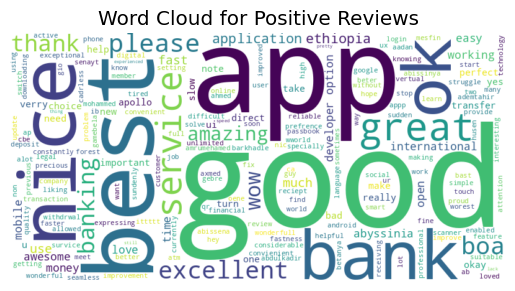

In [19]:
from wordcloud import WordCloud
# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews

This cell generates and displays a word cloud for negative reviews.

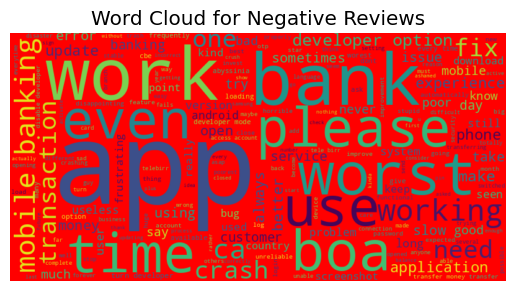

In [20]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

## Assigning Themes to Reviews

This cell assigns thematic labels to each review and displays the results.

In [21]:
# Assigning themes to the reviews
df["themes"] = df["processed_text"].progress_apply(ta.assign_theme)
print(df[["review_text", "themes"]])

100%|██████████| 465/465 [00:00<00:00, 271258.88it/s]

                                           review_text  \
0    Hello, I’m facing a problem with the BOA Mobil...   
1                                          exceptional   
2                                 BoA Mobile good bank   
3                      this is worest app 24/7 loading   
4    This App is not interest for Android phone Ple...   
..                                                 ...   
495  What is the purpose or point of not allowing t...   
496                                            Ayseram   
497                             Worst banking app ever   
498                                            not bad   
499  I can't use the app unless I turn off develope...   

                                                themes  
0    [Performance Issues, Authentication Problems, ...  
1                                              [Other]  
2                                              [Other]  
3                                              [Other]  
4                 

## Saving the final dataframe

This cell saves the processed dataframe, which now includes sentiment and thematic analysis results, to a CSV file for future use or further analysis.

In [22]:
try:
    df.to_csv('../../data/boa_reviews_with_sentiment_and_themes.csv', index=False)
except Exception as e:
    print(f"An error occurred while saving the DataFrame: {e}")
    exit(1)